# Metropolis-Hastings抽样

In [2]:
import random
import math
from scipy.stats import norm    # scipy.stats专门用来生成指定分布
import matplotlib.pyplot as plt

"""
    stats连续型随机变量的公共方法
    rvs：产生服从指定分布的随机数, random variates of given type
    pdf：概率密度函数
    cdf：累计分布函数
    sf：残存函数（1-CDF）
    ppf：分位点函数（CDF的逆）
    isf：逆残存函数（sf的逆）
    fit：对一组随机取样进行拟合，最大似然估计方法找出最适合取样数据的概率密度函数系数。
    *离散分布的简单方法大多数与连续分布很类似，但是pdf被更换为密度函数pmf。
    
    常见分布 stats.
    beta：beta分布
    f：F分布
    gamma：gam分布
    poisson：泊松分布
    hypergeom：超几何分布
    lognorm：对数正态分布
    binom：二项分布
    uniform：均匀分布
    chi2：卡方分布
    cauchy：柯西分布
    laplace：拉普拉斯分布
    rayleigh：瑞利分布
    t：学生T分布
    norm：正态分布
    expon：指数分布
"""

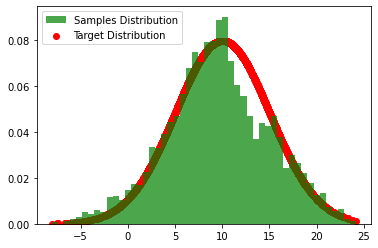

In [12]:
def norm_dist_prob(x):
    y = norm.pdf(x, loc=10, scale=5)  # mu=10,std=5的正态分布在x处的概率密度
    return y

T = 5000  # 采样5000次
pi = [0 for i in range(T)]   # 存储获取的样本，初始状态为0
sigma = 1
t = 0
while t < T-1:
    t += 1
    
    # 以上一状态为中心随机游走得到下一个状态,size设定生成的数组形状与大小
    pi_new = norm.rvs(loc=pi[t-1], scale= sigma, size=1)  
    # 状态转移矩阵为对称的
    alpha = min(1, (norm_dist_prob(pi_new[0]) / norm_dist_prob(pi[t-1])))  
    
    u = random.uniform(0,1)
    pi[t] = pi_star[0] if u < alpha else pi[t-1]
    
plt.scatter(pi, norm.pdf(pi, loc=10, scale=5), label='Target Distribution', c='red')
num_bins = 50   # 直方图有50个块块
plt.hist(pi, num_bins, density=1, facecolor='green', alpha=0.7, label='Samples Distribution')
plt.legend()
plt.show()

In [8]:
y = norm_dist_prob(1)
type(y)

numpy.float64

In [16]:
import random
from scipy.stats import beta, norm
import matplotlib.pyplot as plt

<ipython-input-15-7980bd9f45a3>:15: RuntimeWarning: invalid value encountered in double_scalars
  alpha = min(1, beta_dist_prob(pi_new[0]) / beta_dist_prob(pi[t-1]))
<ipython-input-15-7980bd9f45a3>:15: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = min(1, beta_dist_prob(pi_new[0]) / beta_dist_prob(pi[t-1]))


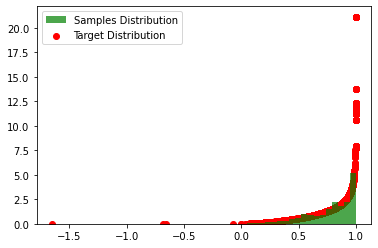

In [15]:
def beta_dist_prob(x):
    a = 2.37
    b = 0.627
    y = beta(a, b).pdf(x)
    return y
    
T = 5000
pi = [0 for i in range(T)]
sigma = 1
t = 0
while t < T-1:
    t += 1
    
    pi_new = norm.rvs(loc=pi[t-1], scale=sigma, size=1)
    alpha = min(1, beta_dist_prob(pi_new[0]) / beta_dist_prob(pi[t-1]))
    
    u = random.uniform(0, 1)
    pi[t] = pi_new[0] if u < alpha else pi[t-1]
    
plt.scatter(pi, beta_dist_prob(pi), label="Target Distribution", c='red')
num_bins = 50
plt.hist(pi, num_bins, density=1, facecolor='green', alpha=0.7, label='Samples Distribution')
plt.legend()
plt.show()

# Gibbs抽样

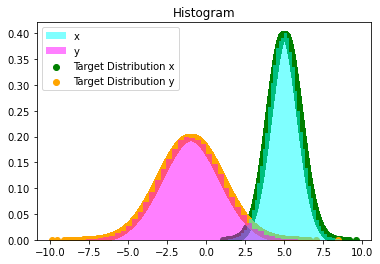

In [22]:
import random
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D  # 绘制三维图
from scipy.stats import multivariate_normal  # 多维正态

def p_x2givenx1(x1, m1, m2, s1, s2):
    return random.normalvariate(m2 + rho * s2 / s1 * (x1 - m1), math.sqrt(1 - rho**2)*s2)

def p_x1givenx2(x2, m1, m2, s1, s2):
    return random.normalvariate(m1 + rho * s1 / s2 * (x2 - m2), math.sqrt(1 - rho**2)*s1)

N = 5000
K = 20
x1_list = []
x2_list = []
z_list = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2

rho = 0.5
x2 = m2   # 初值为均值

# 用来计算二元正态的概率密度
samplesource = multivariate_normal(mean=[m1,m2], cov=[[s1**2,rho*s1*s2],[rho*s1*s2,s2**2]])

for i in range(N):
    for j in range(K):
        x1 = p_x1givenx2(x2, m1, m2, s1, s2) #x2给定得到x1的采样
        x2 = p_x2givenx1(x1, m1, m2, s1, s2) #x1给定得到x2的采样
        z = samplesource.pdf([x1, x2])
        x1_list.append(x1)
        x2_list.append(x2)
        z_list.append(z)

num_bins = 50
plt.scatter(x1_list, norm.pdf(x1_list, loc=m1, scale=s1),label='Target Distribution x1', c= 'green')
plt.scatter(x2_list, norm.pdf(x2_list, loc=m2, scale=s2),label='Target Distribution x2', c= 'orange')
plt.hist(x1_list, num_bins, density=1, facecolor='Cyan', alpha=0.5,label='x1')
plt.hist(x2_list, num_bins, density=1, facecolor='magenta', alpha=0.5,label='x2')
plt.title('Histogram')
plt.legend()
plt.show() 

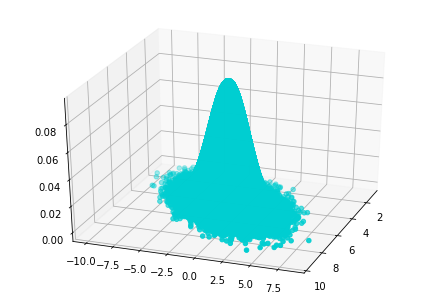

In [23]:
fig = plt.figure()   # 生成图像句柄
ax = Axes3D(fig, rect=[0,0,1,1], elev=30, azim=20)   # 生成坐标句柄
ax.scatter(x1_list, x2_list,z_list, marker='o', c='#00CED1')
plt.show()